## Observations and Insights 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the number of mice.
mouse_results['Mouse ID'].nunique()


249

249 Unique mice in the results

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint'])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


5 timepoint results have been observed as duplicate for Mouse 'g989'.  The table below confirms this for timepoints 0, 5, 10, 15 and 20

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results.loc[mouse_results['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_clean = mouse_results[mouse_results != 'g989']
mouse_results_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Checking the number of mice in the clean DataFrame.
mouse_results_clean['Mouse ID'].nunique()

248

248 Unique mice in the results, this is 1 less mouse than before removing the duplicate records.  Data is now clean.

In [39]:
## Summary Statistics


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
avg_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof=0)
sd_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(ddof=0)
sem_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_mouse_df = pd.DataFrame({'Mean':avg_tumor_vol, 'Median': med_tumor_vol, 'Variance': var_tumor_vol,'StDev':sd_tumor_vol, 'SEM':sem_tumor_vol})

summary_mouse_df


,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.510524,41.557809,31.649641,5.625801,0.371763
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.322552,50.854632,42.088020,6.487528,0.512884
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mouse_groupby = mouse_results_clean.groupby(['Drug Regimen'])

summary_mouse_other = pd.merge(mouse_groupby['Tumor Volume (mm3)'].mean(), mouse_groupby['Tumor Volume (mm3)'].median(), on='Drug Regimen', suffixes=['_Meam', '_Median'])
summary_mouse_other = pd.merge(summary_mouse_other, mouse_groupby['Tumor Volume (mm3)'].var(ddof=0), on='Drug Regimen')
summary_mouse_other = pd.merge(summary_mouse_other, mouse_groupby['Tumor Volume (mm3)'].std(ddof=0), on='Drug Regimen', suffixes=['_Variance', '_StDev'])
summary_mouse_other = pd.merge(summary_mouse_other, mouse_groupby['Tumor Volume (mm3)'].sem(), on='Drug Regimen')
summary_mouse_other = summary_mouse_other.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) SEM'})

summary_mouse_other

,Tumor Volume (mm3)_Meam,Tumor Volume (mm3)_Median,Tumor Volume (mm3)_Variance,Tumor Volume (mm3)_StDev,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.510524,41.557809,31.649641,5.625801,0.371763
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.322552,50.854632,42.088020,6.487528,0.512884
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


## Bar and Pie Charts

In [42]:
mouse_groupby['Mouse ID'].nunique()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

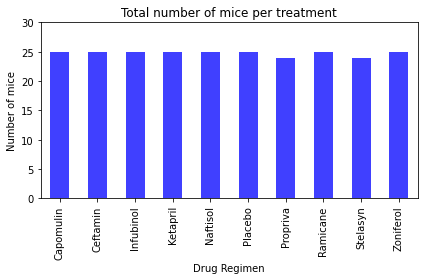

In [43]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_groupby['Mouse ID'].nunique().plot(kind="bar", facecolor="blue", alpha=0.75)

plt.title("Total number of mice per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.ylim(0, mouse_groupby['Mouse ID'].nunique().max() + 5)
plt.tight_layout()

plt.show()

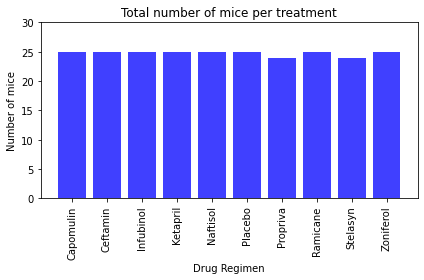

In [87]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment = pd.DataFrame(mouse_groupby['Mouse ID'].nunique().reset_index())

x_axis = np.arange(0, len(treatment), 1)
plt.bar(x_axis, treatment['Mouse ID'], color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatment['Drug Regimen'], rotation='vertical')
plt.ylim(0, max(treatment['Mouse ID'])+5)
plt.title("Total number of mice per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.tight_layout()

plt.show()



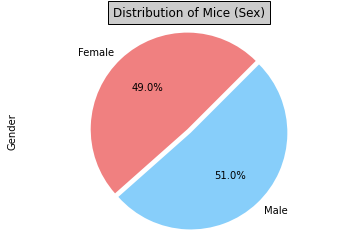

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_groupby = mouse_results_clean.groupby('Sex')
mouse_gender_df = mouse_gender_groupby['Mouse ID'].count()
gender_list = mouse_gender_df.keys().sort_values('Sex')

colours = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)
mouse_gender_pie = mouse_gender_df.plot(kind="pie", y=gender_list, autopct="%1.1f%%",startangle=45, explode=explode, colors=colours)
mouse_gender_pie.set_ylabel("Gender")
mouse_gender_pie.set_title("Distribution of Mice (Sex)", bbox={'facecolor':'0.8', 'pad':5})

plt.axis("equal")
plt.show();


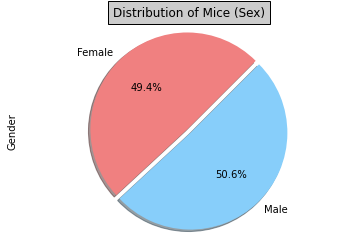

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = mouse_results_clean['Sex'].value_counts().reset_index().sort_values('Sex')

colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(mouse_gender['Sex'], explode=explode, labels=mouse_gender['index'], autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Mice (Sex)", bbox={'facecolor':'0.8', 'pad':5})
ax1.set_ylabel("Gender")

plt.show()


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_results_latest = mouse_results_clean.loc[mouse_results_clean.groupby('Mouse ID')['Timepoint'].idxmax()]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_results_latest = mouse_results_latest.loc[(mouse_results_latest['Drug Regimen'] == 'Capomulin') | (mouse_results_latest['Drug Regimen'] == 'Ramicane') | (mouse_results_latest['Drug Regimen'] == 'Infubinol') | (mouse_results_latest['Drug Regimen'] == 'Ceftamin')]

mouse_results_latest


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1773,a411,45,38.407618,1,Ramicane,Male,3,22
1836,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
1767,y769,45,68.594745,4,Ceftamin,Female,6,27
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1766,y865,45,64.729837,3,Ceftamin,Male,23,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = mouse_results_latest['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, row in mouse_results_latest.iterrows():
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(row['Tumor Volume (mm3)'])
    # add subset   
    
    # Determine outliers using upper and lower bounds
quartiles = mouse_results_latest['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  

The lower quartile of tumor volumes is: 36.9459312375
The upper quartile of tumor volumes is: 59.930261755000004
The interquartile range of tumor volumes is: 22.984330517500005
The the median of tumor volumes is: 45.0 
Values below 2.4694354612499936 could be outliers.
Values above 94.40675753125001 could be outliers.


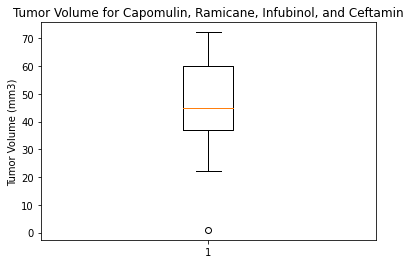

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Capomulin, Ramicane, Infubinol, and Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(mouse_results_latest['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

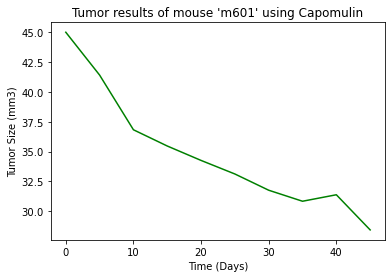

In [72]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selected_mouse = mouse_results_clean.loc[(mouse_results_clean['Mouse ID'] == 'm601')]
mouse = selected_mouse.iloc[1,0]
treatment = selected_mouse.iloc[1,4]

plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'], color="green")

plt.title(f"Tumor results of mouse '{mouse}' using {treatment}")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Size (mm3)")

# Print our chart to the screen
plt.show()

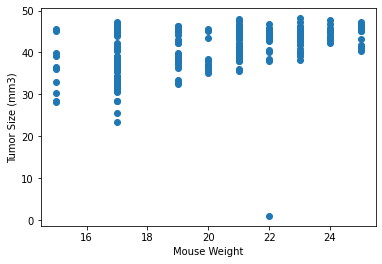

In [80]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
selected_treatment = mouse_results_clean.loc[(mouse_results_clean['Drug Regimen'] == 'Capomulin')]
tumor_size = selected_treatment.iloc[:,2]
mouse_weight = selected_treatment.iloc[:,7]
plt.scatter(mouse_weight, tumor_size)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size (mm3)')
plt.show()
# selected_treatment

## Correlation and Regression

The correlation between mouse weight and tumor size factors is 0.44


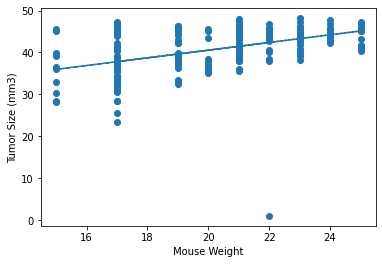

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, tumor_size)
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(mouse_weight, tumor_size)
m_fit = m_slope * mouse_weight + m_int

print(f"The correlation between mouse weight and tumor size factors is {round(correlation[0],2)}")

plt.scatter(mouse_weight, tumor_size)
plt.plot(mouse_weight,m_fit,"--")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size (mm3)')
plt.show()